In [1]:
import math
import numpy as np
from ROOT import gROOT, gDirectory, gPad, gSystem, gStyle
from ROOT import TCanvas, TFile, TProfile, TNtuple, TF1, TH1F, TH2F, THStack, TLegend, TGraphErrors, TMultiGraph, TText, TLatex
from ROOT import TGaxis, TCut
from ROOT import kWhite, kBlack, kGray, kRed, kGreen, kBlue, kYellow, kMagenta, kCyan, kOrange, kSpring, kTeal, kAzure, kViolet, kPink
# %jsroot on

Welcome to JupyROOT 6.18/00


In [2]:
gStyle.SetOptFit(0)
gStyle.SetOptStat(0)  
gStyle.SetOptTitle(1)
gStyle.SetTitleBorderSize(0)
gStyle.SetTitleStyle(0)
gStyle.SetMarkerSize(1)
gStyle.SetTitleX(0.2) 
gStyle.SetTitleY(0.9)
gStyle.SetPadLeftMargin(0.2)

In [3]:
def makePretty(p, color):
    p.SetStats(0)
    p.SetMarkerColor(color)
    p.SetFillColor(color)
    p.SetMarkerStyle(1)
    p.SetMarkerSize(0.2)
    p.SetTitle("")

def makePrettyTGE(tge, color):
    tge.SetMarkerColor(color)
    tge.SetMarkerStyle(21)
    tge.SetMarkerSize(0.5)
    tge.SetLineColor(color)
    tge.SetTitle("")

In [4]:
# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/kaon_analysis/output_250_all_bbbar_Kgamma35_15162_cuts12_250GeV_eL_btag1_0.8_btag2_0.8_nbins40.root")
# file2 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/kaon_analysis/output_250_all_bbbar_Kgamma35_15162_cuts12_250GeV_eL_btag1_0.8_btag2_0.8_nbins40_corr.root")

file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/Hit/DQ_250GeV_test.root")


In [5]:
h_pfo_LeadKaon_p = file1.Get("h_pfo_LeadKaon_p")
h_pfo_LeadPi_p = file1.Get("h_pfo_LeadPi_p")

h_mc_stable_nKaons_evt = file1.Get("h_mc_stable_nKaons_evt")
h_pfo_nKaons_evt = file1.Get("h_pfo_nKaons_evt")

h_pfo_LeadPFO_p_pid = file1.Get("h_pfo_LeadPFO_p_pid")

h_pfo_HitCos_k = file1.Get("h_pfo_HitCos_k")

makePretty(h_pfo_LeadKaon_p, kRed)
makePretty(h_pfo_LeadPi_p, kBlue)

h_mc_stable_nKaons_evt.SetLineColor(kBlack)
h_pfo_nKaons_evt.SetLineColor(kRed)



### NEXT

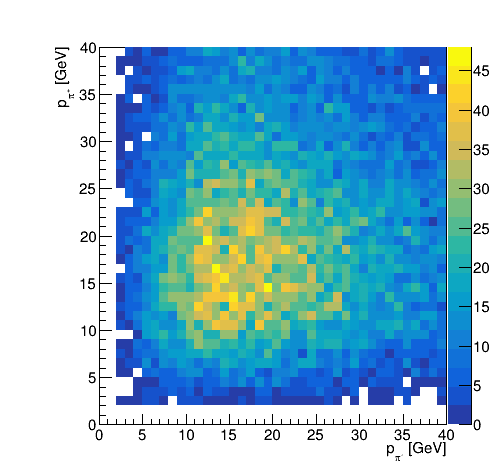

In [6]:
c1 = TCanvas("c1", "c_corr",0,0,500,500)

h_pfo_LeadPi_p.GetXaxis().SetRangeUser(0,40)
h_pfo_LeadPi_p.GetYaxis().SetRangeUser(0,40)
h_pfo_LeadPi_p.Draw("colz")

c1.Draw()

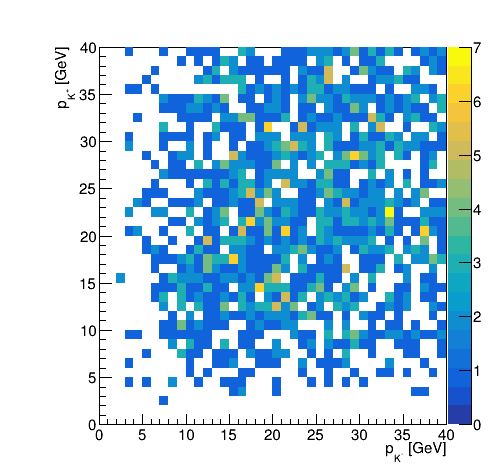

In [7]:
c2 = TCanvas("c2", "c_corr",0,0,500,500)

h_pfo_LeadKaon_p.GetXaxis().SetRangeUser(0,40)
h_pfo_LeadKaon_p.GetYaxis().SetRangeUser(0,40)
h_pfo_LeadKaon_p.Draw("colz")

c2.Draw()

### NEXT

In [8]:
c3 = TCanvas("c3", "c_corr",0,0,500,500);

In [9]:
h_pfo_LeadPi_p.GetXaxis().SetTitle("p_{K^{-},#pi^{-}} [GeV]")
h_pfo_LeadPi_p.GetYaxis().SetTitle("p_{K^{+},#pi^{+}} [GeV]")

h_pfo_LeadPi_p.Draw("colz")
h_pfo_LeadKaon_p.Draw("box same")

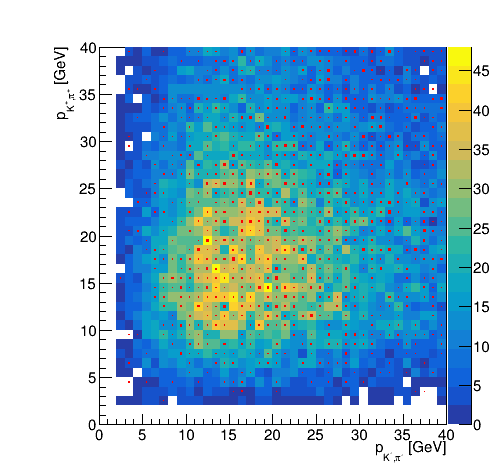

In [10]:
c3.Draw()

### NEXT

In [11]:
c4 = TCanvas("c4", "c_corr",0,0,500,500);

In [12]:
h_mc_stable_nKaons_evt.GetXaxis().SetTitle("nKaons/evt")

h_mc_stable_nKaons_evt.Draw("")
h_pfo_nKaons_evt.Draw("same")

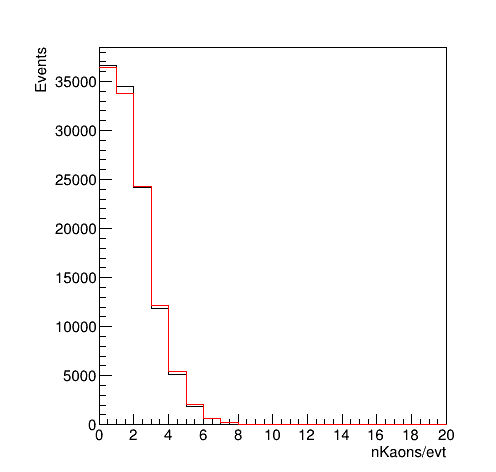

In [13]:
c4.Draw()

### NEXT

In [14]:
c5 = TCanvas("c5", "c_corr",0,0,500,500)

In [15]:
h_pfo_LeadPFO_p_pid.Draw("colz")

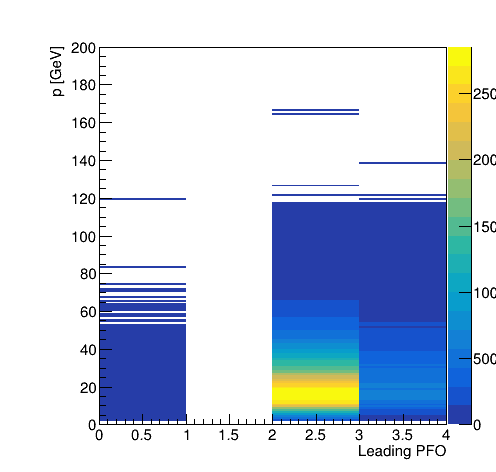

In [16]:
c5.Draw()

### NEXT

In [17]:
def CosMeanGraph(itr, hist, x, y, ex, ey):
    
    for i in range(itr):
        proj  = hist.ProjectionY("proj_kaon",i,i+1)
        x[i]  = hist.GetXaxis().GetBinCenter(i+1)
        y[i]  = proj.GetMean()
        ex[i] = hist.GetXaxis().GetBinWidth(i+1)/2.
        ey[i] = proj.GetRMS()

In [18]:
cos = np.empty(200, dtype=float)
mean_hits = np.empty(200, dtype=float)
e_cos = np.empty(200, dtype=float)
e_mean_hits = np.empty(200, dtype=float)
cosbin = h_pfo_HitCos_k.GetNbinsX()

CosMeanGraph(cosbin, h_pfo_HitCos_k, cos, mean_hits, e_cos, e_mean_hits)

In [19]:
kaonproj = TGraphErrors(cosbin, cos, mean_hits, e_cos, e_mean_hits)
# fCos= TF1("fCos","[0]+[1]*TMath::Log([2]*x+[3])",0.81,0.99)
fCos= TF1("fCos","[0]*x+[1]",0.81,1.0)

fCos.SetLineColor(kRed)

In [20]:
kaonproj.Fit(fCos,"REMS")

 FCN=3.71261 FROM MINOS     STATUS=SUCCESSFUL     24 CALLS         155 TOTAL
                     EDM=1.4258e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -1.11843e+03   4.48780e+01  -6.63190e-01  -2.26733e-05
   2  p1           1.12263e+03   4.10788e+01   4.10788e+01  -3.11535e-05


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5


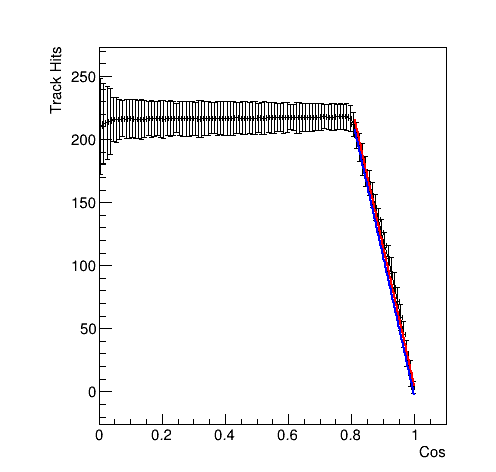

In [21]:
c6 = TCanvas("c5", "c_corr",0,0,500,500)

testfunc = TF1("fCos","-1.11849e3*x+1.115e3",0.81,1.0)
testfunc.SetLineColor(kBlue)

kaonproj.SetTitle(";Cos;Track Hits")
# kaonproj.GetXaxis().SetTitle("Cos")
# kaonproj.GetYaxis().SetTitle("Track Hits")
kaonproj.Draw("ALP")
fCos.Draw("same")
testfunc.Draw("same")
c6.Draw()


In [22]:
h_pfo_HitCos_k.GetEntries()

157009.0